In [1]:
from siphon.catalog import TDSCatalog
from xarray.backends import NetCDF4DataStore
import xarray as xr

from datetime import datetime, date, timedelta

In [2]:
url = 'http://silam.fmi.fi/thredds/catalog/silam_glob_v5_7_1/catalog.xml'

In [3]:
catalog = TDSCatalog(url)
datasets = catalog.datasets

In [4]:
ncss = datasets[0].subset()

In [5]:
west = 90
east = 150
south = -15
north = 15

today = date.today()
obs_time = datetime(today.year, today.month, today.day,
                    hour = 5)

In [6]:
query = ncss.query()
query.variables('cnc_NO2_gas')
query.lonlat_box(west = west, east = east, 
                 south = south, north = north)
query.time(obs_time)

var=cnc_NO2_gas&time=2021-07-12T05%3A00%3A00&west=90&east=150&south=-15&north=15

In [7]:
ds = xr.open_dataset(NetCDF4DataStore(ncss.get_data(query)))

In [8]:
ds_new = ds.sel(hybrid = ds.hybrid[0].values) \
    .sel(time = obs_time)

In [9]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

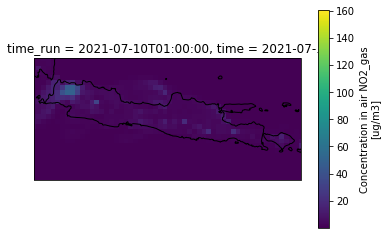

In [10]:
plt.figure()
ax = plt.axes(projection = ccrs.PlateCarree())
ax.set_extent([105, 116, -10, -5])
ax.coastlines()
ds_new.cnc_NO2_gas.plot(ax = ax, transform = ccrs.PlateCarree())